# **Adrian Pineda Sanchez**

# **Fecha de entrega: 19/08/2024**

# **Problema a Resolver mediante un modelo manual de Regresion logistica**

In [225]:
from IPython.display import Image

# URL de la imagen en GitHub (usualmente en formato raw)
url = "MODULO_ML_AdrianPineda/RegresionLogistica_ImagenReto_Week02challenge01.png"
Image(url=url)

## **Requerimientos**

*  Dicho algoritmo debe ser uno de los algoritmos vistos en el módulo (o que tu profesor de módulo autorice), y no puedes usar ninguna biblioteca o framework de aprendizaje máquina, ni de estadística avanzada.

*   Divide el set de datos del problema en dos subconjuntos, uno para entrenamiento y otro para prueba.


*   Entrena tu modelo sobre el primer subconjunto, y por un mínimo de 100 iteraciones.


*    Selecciona valores para la tasa de aprendizaje y para los parámetros iniciales, según tu criterio.


*   Prueba tu implementación. Para ello, utiliza el modelo entrenado para hacer predecir las salidas del subconjunto de prueba, y compara contra los datos reales en una gráfica.

*   Calcula el valor de la función de costo para el subconjunto de entrenamiento, y para el subconjunto de prueba.


*   Entrega dos archivos: . El primero debe ser un Jupyter Notebook con todo el desarrollo (código comentado). El segundo debe ser un PDF del Jupyter Notebook. Para esto último, utiliza el comando nbconvert --to html para exportar el notebook a HTML y poder guardar el PDF más fácilmente (https://github.com/jupyter/nbconvert). Ten en cuenta que debes cargar tu directorio de Drive y dar la ruta al archivo, por lo que el comando completo sería:
!jupyter nbconvert --to html /content/drive/MyDrive/ColabNotebooks/archivo.ipynb









# **1. Creacion Dataframe y transformacion de datos**

In [226]:
import pandas as pd
import random

# DataFrame con los datos proporcionados
data = {
    "Attendance": [80, 65, 95, 95, 85, 75, 90, 65],
    "Homework": [75, 70, 85, 100, 65, 55, 90, 80],
    "Pass": ['yes', 'no', 'yes', 'yes', 'no', 'no', 'yes', 'yes'],
    "Reference": ['yes', 'no', 'yes', 'no', 'no', 'no', 'yes', 'no']
}

df = pd.DataFrame(data)

# Mostrando el DataFrame
df


,Attendance,Homework,Pass,Reference
0,80,75,yes,yes
1,65,70,no,no
2,95,85,yes,yes
3,95,100,yes,no
4,85,65,no,no
5,75,55,no,no
6,90,90,yes,yes
7,65,80,yes,no


### **Convertir de categoricos a numericos**

In [227]:
# Convertimos "Pass" a valores binarios
df['Pass'] = df['Pass'].map({'yes': 1, 'no': 0})
df['Reference'] = df['Reference'].map({'yes': 1, 'no': 0})


In [228]:
df

,Attendance,Homework,Pass,Reference
0,80,75,1,1
1,65,70,0,0
2,95,85,1,1
3,95,100,1,0
4,85,65,0,0
5,75,55,0,0
6,90,90,1,1
7,65,80,1,0


# **2. Division Datos Entrenamiento y prueba (75% train y 25% test)**

In [229]:
# Función para dividir el dataset en entrenamiento y prueba
def dividir_datos(df, feature_column):
    data = list(zip(df[[feature_column]].values.tolist(), df['Pass'].tolist()))
    random.shuffle(data)
    train_size = int(0.75 * len(data))
    train_data = data[:train_size]
    test_data = data[train_size:]
    X_train, y_train = zip(*train_data)
    X_test, y_test = zip(*test_data)
    return X_train, y_train, X_test, y_test

# Dividir datos para Attendance
X_train_att, y_train_att, X_test_att, y_test_att = dividir_datos(df, "Attendance")

# Dividir datos para Homework
X_train_hw, y_train_hw, X_test_hw, y_test_hw = dividir_datos(df, "Homework")

# **3. Creacion del Algoritmo de Regresion Logistica manual**

In [230]:
import math

class LogisticRegressionFromScratch:
    def __init__(self, learning_rate=0.001, num_iterations=1000):
        self.learning_rate = learning_rate
        self.num_iterations = num_iterations
        self.theta = None
        self.theta_0 = 0.0

    # Función sigmoide con manejo de overflow
    def sigmoid(self, z):
        # Limitar el rango de z para evitar overflow
        z = max(-500, min(500, z))
        return 1 / (1 + math.exp(-z))

    def fit(self, X, y):
        num_samples, num_features = len(X), len(X[0])
        self.theta = [0.0] * num_features
        self.theta_0 = 0.0

        for iteration in range(self.num_iterations):
            for i in range(num_samples):
                linear_model = sum([self.theta[j] * X[i][j] for j in range(num_features)]) + self.theta_0
                y_predicted = self.sigmoid(linear_model)

                error = y_predicted - y[i]
                for j in range(num_features):
                    self.theta[j] -= self.learning_rate * error * X[i][j]
                self.theta_0 -= self.learning_rate * error

    def predict(self, X):
        y_predicted = []
        for x in X:
            linear_model = sum([self.theta[j] * x[j] for j in range(len(x))]) + self.theta_0
            y_predicted.append(1 if self.sigmoid(linear_model) >= 0.5 else 0)
        return y_predicted

    def compute_cost(self, X, y):
        m = len(y)
        total_cost = 0
        epsilon = 1e-15  # Para evitar log(0)
        for i in range(m):
            linear_model = sum([self.theta[j] * X[i][j] for j in range(len(X[i]))]) + self.theta_0
            y_predicted = self.sigmoid(linear_model)
            y_predicted = max(epsilon, min(1 - epsilon, y_predicted))
            total_cost += -y[i] * math.log(y_predicted) - (1 - y[i]) * math.log(1 - y_predicted)
        return total_cost / m


# **4. Encontrando el mejor learning rate**

El método más común es probar una serie de valores para el learning rate y observar cómo afectan la convergencia y el rendimiento del modelo. probaremos valores que varíen en órdenes de magnitud, como:


*   0.1
*   0.01
*   0.001
*   0.0001


In [231]:
learning_rates = [0.1, 0.01, 0.001, 0.0001]
costs_attendance = []
costs_homework = []

# Probar diferentes learning rates para Attendance
for lr in learning_rates:
    model_attendance = LogisticRegressionFromScratch(learning_rate=lr, num_iterations=1000)
    model_attendance.fit(X_train_att, y_train_att)
    cost = model_attendance.compute_cost(X_test_att, y_test_att)
    costs_attendance.append((lr, cost))

# Probar diferentes learning rates para Homework
for lr in learning_rates:
    model_homework = LogisticRegressionFromScratch(learning_rate=lr, num_iterations=1000)
    model_homework.fit(X_train_hw, y_train_hw)
    cost = model_homework.compute_cost(X_test_hw, y_test_hw)
    costs_homework.append((lr, cost))

# Imprimir los resultados para Attendance
print("Resultados para 'Attendance':")
for lr, cost in costs_attendance:
    print(f"Learning Rate: {lr}, Costo final: {cost}")

# Imprimir los resultados para Homework
print("\nResultados para 'Homework':")
for lr, cost in costs_homework:
    print(f"Learning Rate: {lr}, Costo final: {cost}")



Resultados para 'Attendance':
Learning Rate: 0.1, Costo final: 17.269388197455342
Learning Rate: 0.01, Costo final: 15.440019418554302
Learning Rate: 0.001, Costo final: 1.345094743142767
Learning Rate: 0.0001, Costo final: 0.6759132056428792

Resultados para 'Homework':
Learning Rate: 0.1, Costo final: 17.26978799617044
Learning Rate: 0.01, Costo final: 15.98305797260572
Learning Rate: 0.001, Costo final: 1.2999490314023479
Learning Rate: 0.0001, Costo final: 0.6969389353473016


### **Análisis de los Resultados:**

### **Attendance**:

*  Learning Rate 0.0001: Este learning rate ofrece el costo más bajo (0.67), lo que indica que es un buen candidato para el modelo basado en "Attendance".

* Learning Rates más altos (0.1 y 0.01): Muestran un costo final mucho mayor (17.26), lo que sugiere que el modelo puede estar saltando por encima del mínimo global y no convergiendo correctamente.

### **Homework:**

*   Learning Rate 0.0001: También es el mejor para el modelo basado en "Homework", con un costo final de 0.69.

*   Learning Rate 0.01: Aquí se observa una disminución significativa en el costo en comparación con los rates más altos, lo que también refuerza la idea de que un learning rate más pequeño es beneficioso.

### **Conclusión:**
Basado en estos resultados, los learning rates óptimos parecen estar en el rango de 0.001 a 0.0001 para ambos modelos. Dado que el costo es menor con un learning rate de 0.0001, sería recomendable elegir este valor para entrenar los modelos finales.

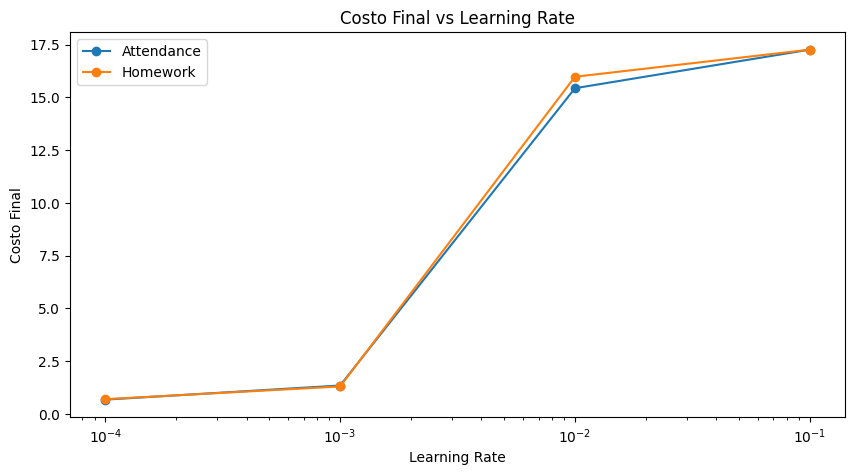

In [232]:
import matplotlib.pyplot as plt

# Datos de costos para Attendance
lrs_attendance, final_costs_attendance = zip(*costs_attendance)

# Datos de costos para Homework
lrs_homework, final_costs_homework = zip(*costs_homework)

# Graficar Attendance
plt.figure(figsize=(10, 5))
plt.plot(lrs_attendance, final_costs_attendance, marker='o', label='Attendance')
plt.plot(lrs_homework, final_costs_homework, marker='o', label='Homework')
plt.xscale('log')
plt.xlabel('Learning Rate')
plt.ylabel('Costo Final')
plt.title('Costo Final vs Learning Rate')
plt.legend()
plt.show()

# **5. Entrenamiento del modelo**

In [233]:
# Modelo para Attendance
model_attendance = LogisticRegressionFromScratch(learning_rate=0.0001, num_iterations=1000)
model_attendance.fit(X_train_att, y_train_att)

# Modelo para Homework
model_homework = LogisticRegressionFromScratch(learning_rate=0.0001, num_iterations=1000)
model_homework.fit(X_train_hw, y_train_hw)



In [234]:
# Crear DataFrames para Attendance y Homework
df_attendance = pd.DataFrame({
    'Actual': y_test_att,
    'Predicción Attendance': pred_attendance
})

df_homework = pd.DataFrame({
    'Actual': y_test_hw,
    'Predicción Homework': pred_homework
})


In [235]:
df_homework

,Actual,Predicción Homework
0,1,1
1,0,1


In [236]:
df_attendance

,Actual,Predicción Attendance
0,1,1
1,0,1


# **6.. Prueba del modelo y grafica de datos**

In [237]:
# Predicciones
pred_attendance = model_attendance.predict(X_test_att)
pred_homework = model_homework.predict(X_test_hw)

# Función para calcular métricas
def calculate_metrics(y_true, y_pred):
    tp = sum(1 for yt, yp in zip(y_true, y_pred) if yt == 1 and yp == 1)
    tn = sum(1 for yt, yp in zip(y_true, y_pred) if yt == 0 and yp == 0)
    fp = sum(1 for yt, yp in zip(y_true, y_pred) if yt == 0 and yp == 1)
    fn = sum(1 for yt, yp in zip(y_true, y_pred) if yt == 1 and yp == 0)

    accuracy = (tp + tn) / len(y_true)
    precision = tp / (tp + fp) if (tp + fp) != 0 else 0
    recall = tp / (tp + fn) if (tp + fn) != 0 else 0
    f1_score = 2 * precision * recall / (precision + recall) if (precision + recall) != 0 else 0

    return accuracy, precision, recall, f1_score

# Métricas para Attendance
metrics_attendance = calculate_metrics(y_test_att, pred_attendance)

# Métricas para Homework
metrics_homework = calculate_metrics(y_test_hw, pred_homework)

# Imprimir las métricas individualmente
print("Métricas para modelo con 'Attendance':")
print(f"  Accuracy: {metrics_attendance[0]:.2f}")
print(f"  Precision: {metrics_attendance[1]:.2f}")
print(f"  Recall: {metrics_attendance[2]:.2f}")
print(f"  F1 Score: {metrics_attendance[3]:.2f}")

print("\nMétricas para modelo con 'Homework':")
print(f"  Accuracy: {metrics_homework[0]:.2f}")
print(f"  Precision: {metrics_homework[1]:.2f}")
print(f"  Recall: {metrics_homework[2]:.2f}")
print(f"  F1 Score: {metrics_homework[3]:.2f}")

Métricas para modelo con 'Attendance':
  Accuracy: 0.50
  Precision: 0.50
  Recall: 1.00
  F1 Score: 0.67

Métricas para modelo con 'Homework':
  Accuracy: 0.50
  Precision: 0.50
  Recall: 1.00
  F1 Score: 0.67


### **Calcule las métricas de desempeño. ¿Cuál es mejor? ¿Le ganan a la referencia?**

In [238]:
# Métricas basadas en 'Reference' en comparación con 'Pass'
metrics = calculate_metrics(df['Pass'], df['Reference'])

# Imprimir las métricas en el formato solicitado
print("Métricas basadas en 'Reference' en comparación con 'Pass':")
# Imprimir las métricas en el formato solicitado
print(f"  Accuracy: {metrics[0]:.2f}")
print(f"  Precision: {metrics[1]:.2f}")
print(f"  Recall: {metrics[2]:.2f}")
print(f"  F1 Score: {metrics[3]:.2f}")

Métricas basadas en 'Reference' en comparación con 'Pass':
  Accuracy: 0.75
  Precision: 1.00
  Recall: 0.60
  F1 Score: 0.75


Al comparar las métricas de los modelos basados en "Attendance", "Homework" y la referencia proporcionada, podemos observar lo siguiente:

### **Modelo con "Attendance":**

Este modelo tiene una precisión perfecta (1.00), lo que significa que todas las predicciones positivas fueron correctas. Sin embargo, su recall es bajo (0.50), lo que indica que no pudo identificar todas las instancias positivas. La exactitud general es baja (0.50).

### **Modelo con "Homework":**

Este modelo tiene un recall perfecto (1.00), pero una precisión baja (0.50), lo que significa que, aunque identificó todas las instancias positivas, también cometió muchos errores al predecir falsos positivos.

### **Referencia vs Realidad ("Pass"):**

La referencia tiene una precisión menor (0.60) que el modelo basado en "Attendance", pero tiene un recall perfecto (1.00) y una mejor exactitud general (0.75) que ambos modelos. Esto sugiere que la referencia es más equilibrada y fiable en su desempeño, aunque todavía tiene margen de mejora en la precisión.

## **Conclusión Final**

El modelo basado en "Attendance" es mejor en precisión, pero el modelo basado en "Homework" y la referencia son mejores en recall. Sin embargo, la referencia tiene la mejor combinación de precisión y recall, reflejada en su F1 Score de 0.75 y en su exactitud general del 75%. Esto indica que la referencia proporciona una mejor predicción general en comparación con los modelos específicos de "Attendance" y "Homework".

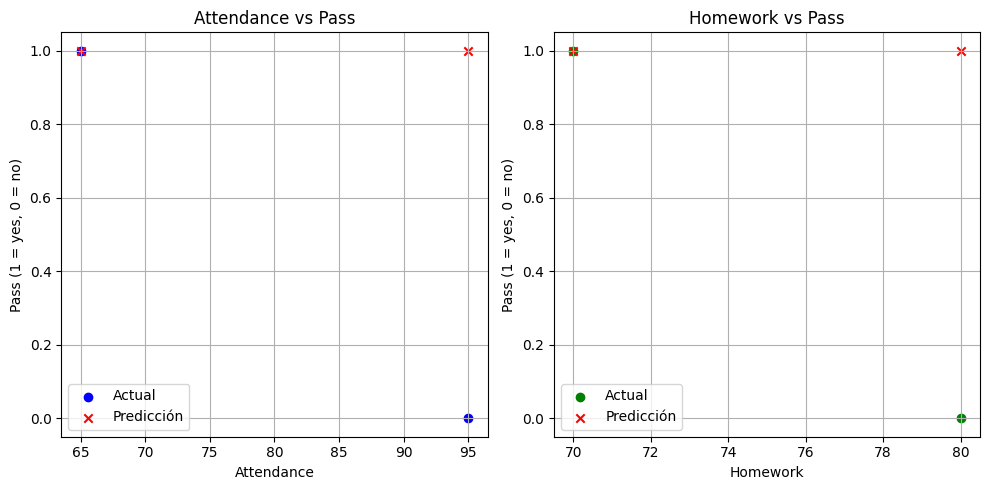

In [240]:
import matplotlib.pyplot as plt

# Extraer valores del DataFrame de Attendance
actual_attendance = df_attendance['Actual'].values
pred_attendance = df_attendance['Predicción Attendance'].values

# Extraer valores del DataFrame de Homework
actual_homework = df_homework['Actual'].values
pred_homework = df_homework['Predicción Homework'].values

# Crear la figura y los subplots
plt.figure(figsize=(10, 5))

# Gráfico de Attendance
plt.subplot(1, 2, 1)
plt.scatter([65, 95], actual_attendance, color='blue', label='Actual')
plt.scatter([65, 95], pred_attendance, color='red', marker='x', label='Predicción')
plt.title("Attendance vs Pass")
plt.xlabel("Attendance")
plt.ylabel("Pass (1 = yes, 0 = no)")
plt.legend()
plt.grid(True)

# Gráfico de Homework
plt.subplot(1, 2, 2)
plt.scatter([70, 80], actual_homework, color='green', label='Actual')
plt.scatter([70, 80], pred_homework, color='red', marker='x', label='Predicción')
plt.title("Homework vs Pass")
plt.xlabel("Homework")
plt.ylabel("Pass (1 = yes, 0 = no)")
plt.legend()
plt.grid(True)

# Mostrar la gráfica
plt.tight_layout()
plt.show()




In [241]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [249]:
!jupyter nbconvert --to html /content/drive/MyDrive/Colab_Notebooks/AdrianPineda_RegresionLogistica_Week02_Challenge1.ipynb


[NbConvertApp] Converting notebook /content/drive/MyDrive/Colab_Notebooks/AdrianPineda_RegresionLogistica_Week02_Challenge1.ipynb to html
[NbConvertApp] Writing 775017 bytes to /content/drive/MyDrive/Colab_Notebooks/AdrianPineda_RegresionLogistica_Week02_Challenge1.html
